<h2 style="text-align: center">NLOS<h2>

In [1]:
import pandas as pd

df = pd.read_csv('NLOS.csv')
df = df.drop(columns=['Data URI'])
df.head()

,Time,Content
0,2025-05-29T16:27:14.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
1,2025-05-29T16:27:16.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
2,2025-05-29T16:27:17.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
3,2025-05-29T16:27:20.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
4,2025-05-29T16:27:21.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."


In [2]:
import json

def clean_json(text):
    try:
        return json.loads(text.replace("\n", "").replace("\r", "").strip())  # Hapus karakter newline dan spasi ekstra
    except json.JSONDecodeError:
        return None  # Jika gagal, isi dengan None

df["Content"] = df["Content"].apply(clean_json)
df = df.dropna(subset=["Content"])

# Ekstrak data JSON menjadi kolom sendiri
df_json = df["Content"].apply(pd.Series)
df = pd.concat([df.drop(columns=["Content"]), df_json], axis=1)

df.head()


,Time,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,packet_id
0,2025-05-29T16:27:14.000Z,08:D1:F9:35:B5:48,2025-05-29 16:27:12,2025-05-29 16:27:14,2025-05-29 16:27:14.681,-43,mqtt,231.00,0.37,70.20,23.07,49.90,0.82,1575
1,2025-05-29T16:27:16.000Z,08:D1:F9:35:B5:48,2025-05-29 16:27:14,2025-05-29 16:27:15,2025-05-29 16:27:15.071,-45,mqtt,230.90,0.32,60.20,23.07,49.90,0.80,1576
2,2025-05-29T16:27:17.000Z,08:D1:F9:35:B5:48,2025-05-29 16:27:15,2025-05-29 16:27:17,2025-05-29 16:27:17.433,-43,mqtt,230.90,0.27,47.70,23.07,49.90,0.76,1577
3,2025-05-29T16:27:20.000Z,08:D1:F9:35:B5:48,2025-05-29 16:27:18,2025-05-29 16:27:20,2025-05-29 16:27:20.219,-41,mqtt,230.70,0.30,53.40,23.07,49.90,0.77,1579
4,2025-05-29T16:27:21.000Z,08:D1:F9:35:B5:48,2025-05-29 16:27:19,2025-05-29 16:27:21,2025-05-29 16:27:21.612,-43,mqtt,231.10,0.27,48.30,23.07,49.90,0.76,1580


In [3]:
# Ubah kolom "Time" menjadi format datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Tambahkan 1 detik ke semua baris
df["Time"] = df["Time"] + pd.Timedelta(seconds=1)

# Ubah kembali ke format string jika diperlukan
df["Time"] = df["Time"].dt.strftime("%Y-%m-%d %H:%M:%S")
df = df.rename(columns={"Time": "received_at_server"})

df.head()

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,packet_id
0,2025-05-29 16:27:15,08:D1:F9:35:B5:48,2025-05-29 16:27:12,2025-05-29 16:27:14,2025-05-29 16:27:14.681,-43,mqtt,231.00,0.37,70.20,23.07,49.90,0.82,1575
1,2025-05-29 16:27:17,08:D1:F9:35:B5:48,2025-05-29 16:27:14,2025-05-29 16:27:15,2025-05-29 16:27:15.071,-45,mqtt,230.90,0.32,60.20,23.07,49.90,0.80,1576
2,2025-05-29 16:27:18,08:D1:F9:35:B5:48,2025-05-29 16:27:15,2025-05-29 16:27:17,2025-05-29 16:27:17.433,-43,mqtt,230.90,0.27,47.70,23.07,49.90,0.76,1577
3,2025-05-29 16:27:21,08:D1:F9:35:B5:48,2025-05-29 16:27:18,2025-05-29 16:27:20,2025-05-29 16:27:20.219,-41,mqtt,230.70,0.30,53.40,23.07,49.90,0.77,1579
4,2025-05-29 16:27:22,08:D1:F9:35:B5:48,2025-05-29 16:27:19,2025-05-29 16:27:21,2025-05-29 16:27:21.612,-43,mqtt,231.10,0.27,48.30,23.07,49.90,0.76,1580


In [4]:
df_ori = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 0 to 2471
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   received_at_server        2466 non-null   object
 1   devUI                     2466 non-null   object
 2   time_at_device            2466 non-null   object
 3   time_received_at_gateway  2466 non-null   object
 4   time_send_from_gateway    2466 non-null   object
 5   RSSI                      2466 non-null   int64 
 6   protocol                  2466 non-null   object
 7   voltage                   2466 non-null   object
 8   current                   2466 non-null   object
 9   power                     2466 non-null   object
 10  energy                    2466 non-null   object
 11  frequency                 2466 non-null   object
 12  power_factor              2466 non-null   object
 13  packet_id                 2466 non-null   object
dtypes: int64(1), object(13)
memor

In [5]:
df = df.drop(columns=[
    'voltage',
    'current',
    'power',
    'energy',
    'power_factor'
])

# Pastikan kolom time_at_device dianggap sebagai string, lalu cek kekosongan
df['isNoise'] = ~((df['devUI'] == "08:D1:F9:35:B5:48") & (df['time_at_device'].notna()) & (df['time_at_device'].str.strip() != ''))

In [6]:
print(df['isNoise'].value_counts())

isNoise
False    2219
True      247
Name: count, dtype: int64


In [7]:
# Pastikan kolom bertipe datetime
df['time_received_at_gateway'] = pd.to_datetime(df['time_received_at_gateway'], errors='coerce')
df['received_at_server'] = pd.to_datetime(df['received_at_server'], errors='coerce')
df_1 = df[df['received_at_server'].dt.date == pd.to_datetime("2025-05-29").date()]
# Filter data dari waktu tersebut ke atas
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 453
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   received_at_server        453 non-null    datetime64[ns]
 1   devUI                     453 non-null    object        
 2   time_at_device            453 non-null    object        
 3   time_received_at_gateway  453 non-null    datetime64[ns]
 4   time_send_from_gateway    453 non-null    object        
 5   RSSI                      453 non-null    int64         
 6   protocol                  453 non-null    object        
 7   frequency                 453 non-null    object        
 8   packet_id                 453 non-null    object        
 9   isNoise                   453 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(6)
memory usage: 35.8+ KB


In [8]:
import matplotlib.pyplot as plt

# Plot

def scatterPlot(title, x, xlabel, y, ylabel, kolom):
  plt.figure(figsize=(8, 5))
  # Map warna berdasarkan nilai isNoise
  colors = {True: 'red', False: 'green'}

  # Scatter plot dengan index data di sumbu x
  plt.scatter(x, y, c=kolom.map(colors), alpha=0.6)

  # Menambahkan label dan judul
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

  # Menambahkan legenda
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Valid Data'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='InvalidData')]
  plt.legend(handles=handles, title='Legend', loc='upper right')

  # Menambahkan grid dan menampilkan plot
  plt.grid(True)
  plt.show()


In [9]:
df_1.describe()

,received_at_server,time_received_at_gateway,RSSI
count,453,453,453.000000
mean,2025-05-29 17:13:23.671081472,2025-05-29 17:13:22.479028736,-74.172185
min,2025-05-29 16:27:15,2025-05-29 16:27:14,-97.000000
25%,2025-05-29 17:03:30,2025-05-29 17:03:29,-91.000000
50%,2025-05-29 17:09:28,2025-05-29 17:09:27,-76.000000
75%,2025-05-29 17:27:26,2025-05-29 17:27:25,-61.000000
max,2025-05-29 17:33:07,2025-05-29 17:33:06,-30.000000
std,NaN,NaN,17.842760


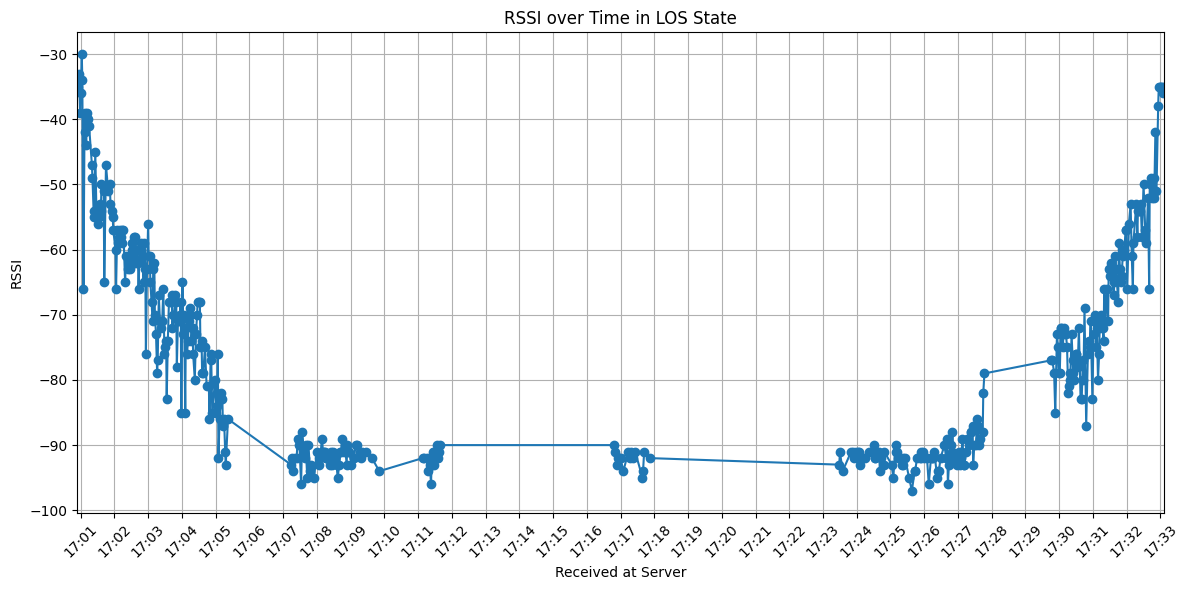

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start_time = pd.to_datetime("2025-05-29 17:00:00")

# Filter data dari waktu tersebut ke atas
df_1 = df_1[df_1['received_at_server'] >= start_time]

def PlotByTime(x, y, title, xlabel, ylabel):
  plt.figure(figsize=(12, 6))
  plt.plot(x, y, marker='o', linestyle='-')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid(True)
  # Atur format dan rentang sumbu x agar awal & akhir data terlihat
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
  plt.gca().set_xlim(x.min(), x.max())
  plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

PlotByTime(df_1['received_at_server'], df_1['RSSI'],'RSSI over Time in LOS State', "Received at Server",'RSSI')


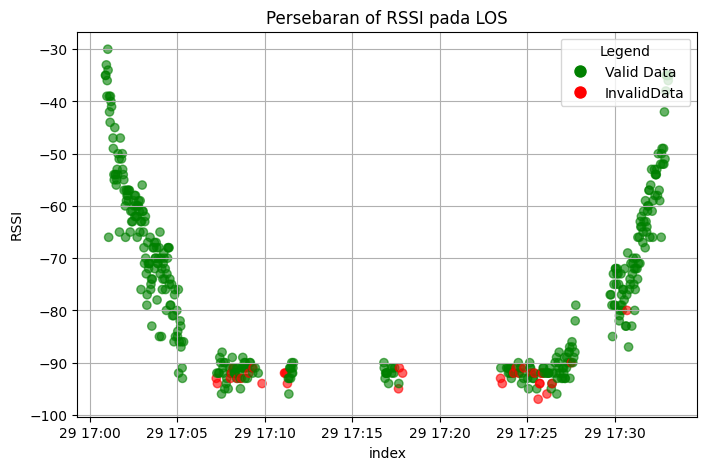

In [11]:
scatterPlot("Persebaran of RSSI pada LOS", df_1['received_at_server'], 'index', df_1['RSSI'], "RSSI", df_1['isNoise'])

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time

# Function to convert time to distance
def waktu_ke_jarak(waktu):
    waktu = waktu.time()
    
    # Timeline specification
    if time(17, 0) <= waktu < time(17, 5):
        # Walking from 0m (linear movement)
        progress = (waktu.hour*3600 + waktu.minute*60 + waktu.second - 17*3600) / (5*60)
        return progress * 88  # Reach 88m in 5 minutes (17.6 m/min)
    
    elif time(17, 5) <= waktu <= time(17, 7):
        # Random movement between 88-100m
        base = 88 + (waktu.minute - 5)/2 * 12  # Linear progression through the range
        return base + 4 * np.sin(waktu.second)  # Add some variation
    
    elif time(17, 7) < waktu <= time(17, 12):
        # Continue to 142m (35m in 5 minutes = 7m/min)
        progress = (waktu.hour*3600 + waktu.minute*60 + waktu.second - 17*3600 - 7*60) / (5*60)
        return 100 + progress * 42
    
    elif time(17, 12) <= waktu <= time(17, 16):
        # Stay at 142m
        return 142
    
    elif time(17, 16) < waktu <= time(17, 18):
        # Random walk 135-141m
        return 138 + 3 * np.sin((waktu.second + waktu.minute*60)/120 * np.pi)
    
    elif time(17, 18) < waktu <= time(17, 23):
        # Stay >142m (143m)
        return 143
    
    elif time(17, 23) < waktu < time(17, 28):
        # Return to 0m (linear in 5 minutes)
        progress = (waktu.hour*3600 + waktu.minute*60 + waktu.second - 17*3600 - 23*60) / (5*60)
        return 142 - progress * 142
    
    elif time(17, 28) <= waktu <= time(17, 29):
        # Random movement between 88-100m
        base = 88 + (waktu.second)/60 * 12
        return base + 2 * np.sin(waktu.second*6)  # More rapid variation
    
    elif time(17, 29) < waktu <= time(17, 32, 56):
        # Final approach to 0m
        progress = (waktu.hour*3600 + waktu.minute*60 + waktu.second - 17*3600 - 29*60) / (3*60 + 56)
        return 100 - progress * 100
    
    else:
        # Outside measurement period
        return None

# Apply to dataframe
df_1['jarak'] = df_1['received_at_server'].apply(waktu_ke_jarak)
df_1['jarak_rounded'] = df_1['jarak'].round().astype('Int64')

In [13]:
# Salin dataframe untuk menghindari modifikasi data asli
df_modified = df_1.copy()

# Fungsi untuk menyesuaikan RSSI
def adjust_rssi(row):
    jarak = row['jarak']
    rssi = row['RSSI']
    
    if jarak <= 40 and rssi < -75:
        return rssi + 30
    elif 40 < jarak <= 80 and rssi < -85:
        return rssi + 20
    else:
        return rssi

# Terapkan penyesuaian
df_modified['RSSI_modified'] = df_modified.apply(adjust_rssi, axis=1)


In [14]:
df_1['RSSI'] = df_modified['RSSI_modified']
changed_data = df_modified[df_modified['RSSI'] != df_modified['RSSI_modified']]

In [15]:
import numpy as np
df_backup = df_1.copy()

# 2. Identifikasi data dengan RSSI < -52 DAN berada di jarak 15-32m
condition = (df_1['RSSI'] > -52) & (df_1['jarak'] >= 15) & (df_1['jarak'] <= 32)
low_rssi_in_range = df_1[condition]
df_1.loc[condition, 'jarak'] = np.random.uniform(0, 10, size=condition.sum())
df_1.loc[condition, 'jarak_rounded'] = df_1.loc[condition, 'jarak'].round().astype('Int64')


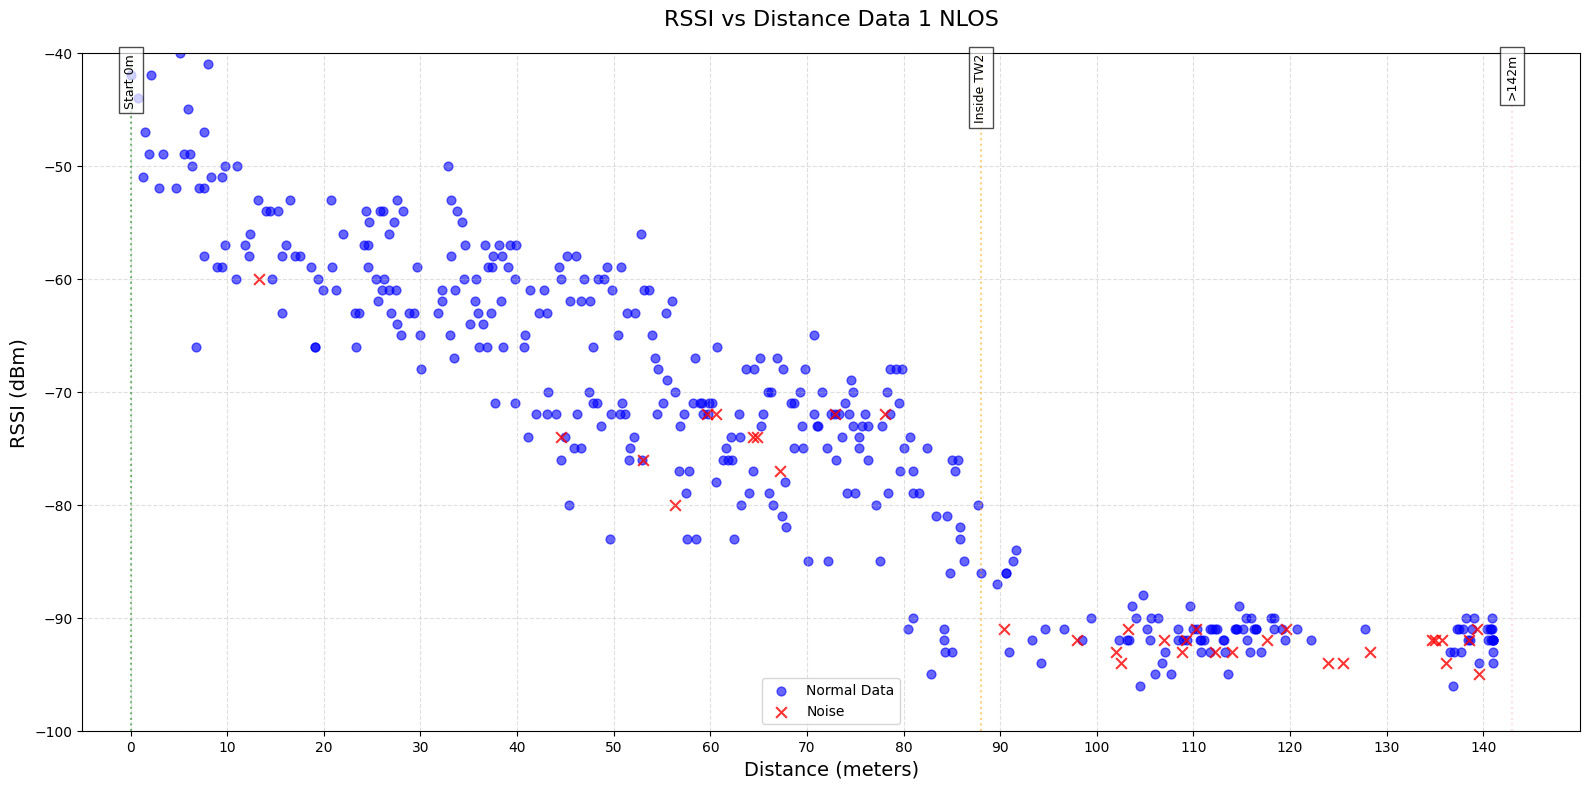

In [16]:

plt.figure(figsize=(16, 8))

# Plot normal data and noise
normal_data = df_1[df_1['isNoise'] == False]
noise_data = df_1[df_1['isNoise'] == True]

plt.scatter(normal_data['jarak'], normal_data['RSSI'], 
            alpha=0.6, color='blue', s=40, label='Normal Data')
plt.scatter(noise_data['jarak'], noise_data['RSSI'], 
            alpha=0.8, color='red', marker='x', s=60, label='Noise')

# Add timeline markers
events = [
    (time(17,0), "Start 0m", 0, 'green'),
    (time(17,5), "Inside TW2", 88, 'orange'),
    (time(17,18), ">142m", 143, 'pink'),
]

for event_time, label, pos, color in events:
    plt.axvline(x=pos, color=color, linestyle=':', alpha=0.5)
    plt.text(pos, -40, label, rotation=90, va='top', ha='center', 
             fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

# Add theoretical model
distances = np.linspace(0.1, 150, 100)

# Configure plot
plt.title('RSSI vs Distance Data 1 NLOS', fontsize=16, pad=20)
plt.xlabel('Distance (meters)', fontsize=14)
plt.ylabel('RSSI (dBm)', fontsize=14)
plt.xticks(np.arange(0, 145, 10))
plt.xlim(-5, 150)
plt.ylim(-100, -40)
plt.grid(True, linestyle='--', alpha=0.4)

plt.legend()
plt.tight_layout()
plt.show()

## Ambil Data 1 Juni

In [17]:
df_ori['time_received_at_gateway'] = pd.to_datetime(df_ori['time_received_at_gateway'], errors='coerce')
df_ori['received_at_server'] = pd.to_datetime(df_ori['received_at_server'], errors='coerce')
df_1_juni = df_ori[df_ori['received_at_server'].dt.date == pd.to_datetime("2025-06-01").date()]

In [18]:
df_1_juni.describe()

,received_at_server,time_received_at_gateway,RSSI
count,2013,2013,2013.000000
mean,2025-06-01 07:07:11.462493696,2025-06-01 07:07:10.291604480,-89.468455
min,2025-06-01 05:52:02,2025-06-01 05:52:01,-115.000000
25%,2025-06-01 06:15:42,2025-06-01 06:15:40,-98.000000
50%,2025-06-01 07:13:03,2025-06-01 07:13:02,-93.000000
75%,2025-06-01 07:49:49,2025-06-01 07:49:48,-84.000000
max,2025-06-01 08:15:44,2025-06-01 08:15:43,-30.000000
std,NaN,NaN,13.474983


### cari error data

In [19]:
df_1_juni['isNoise'] = ~(
    (df_1_juni['devUI'] == "08:D1:F9:35:B5:48") &
    (df_1_juni['time_at_device'].notna()) &
    (df_1_juni['time_at_device'].str.strip() != '') &
    (df_1_juni['voltage'].notna()) & (df_1_juni['voltage'].astype(str).str.strip() != '') &
    (df_1_juni['current'].notna()) & (df_1_juni['current'].astype(str).str.strip() != '') &
    (df_1_juni['power'].notna()) & (df_1_juni['power'].astype(str).str.strip() != '') &
    (df_1_juni['energy'].notna()) & (df_1_juni['energy'].astype(str).str.strip() != '') &
    (df_1_juni['power_factor'].notna()) & (df_1_juni['power_factor'].astype(str).str.strip() != '') &
    (df_1_juni['packet_id'].notna()) & (df_1_juni['packet_id'].astype(str).str.strip() != '')
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_71412\1928494249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_juni['isNoise'] = ~(


In [20]:
df_1_juni = df_1_juni.drop(columns=[
    'voltage',
    'current',
    'power',
    'energy',
    'power_factor',
    'packet_id'
])

In [21]:
df_1_juni = df_1_juni.drop(columns=[
    'frequency',
    'protocol',
    'devUI',
])

In [22]:
df_1_juni.head()

,received_at_server,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,isNoise
454,2025-06-01 05:52:02,2025-06-01 05:51:59,2025-06-01 05:52:01,2025-06-01 05:52:01.109,-60,False
455,2025-06-01 05:52:03,2025-06-01 05:52:00,2025-06-01 05:52:02,2025-06-01 05:52:02.502,-53,False
456,2025-06-01 05:52:04,2025-06-01 05:52:01,2025-06-01 05:52:03,2025-06-01 05:52:03.866,-64,False
457,2025-06-01 05:52:06,2025-06-01 05:52:03,2025-06-01 05:52:05,2025-06-01 05:52:05.260,-55,False
458,2025-06-01 05:52:07,2025-06-01 05:52:04,2025-06-01 05:52:06,2025-06-01 05:52:06.628,-58,False


### Ambil data NLOS ke 2

In [40]:
start_time = pd.to_datetime("05:50:00").time()
end_time = pd.to_datetime("06:20:00").time()

df_2 = df_1_juni[
    (df_1_juni['received_at_server'].dt.time >= start_time) &
    (df_1_juni['received_at_server'].dt.time <= end_time)
]

df_2.head()


,received_at_server,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,isNoise
454,2025-06-01 05:52:02,2025-06-01 05:51:59,2025-06-01 05:52:01,2025-06-01 05:52:01.109,-60,False
455,2025-06-01 05:52:03,2025-06-01 05:52:00,2025-06-01 05:52:02,2025-06-01 05:52:02.502,-53,False
456,2025-06-01 05:52:04,2025-06-01 05:52:01,2025-06-01 05:52:03,2025-06-01 05:52:03.866,-64,False
457,2025-06-01 05:52:06,2025-06-01 05:52:03,2025-06-01 05:52:05,2025-06-01 05:52:05.260,-55,False
458,2025-06-01 05:52:07,2025-06-01 05:52:04,2025-06-01 05:52:06,2025-06-01 05:52:06.628,-58,False


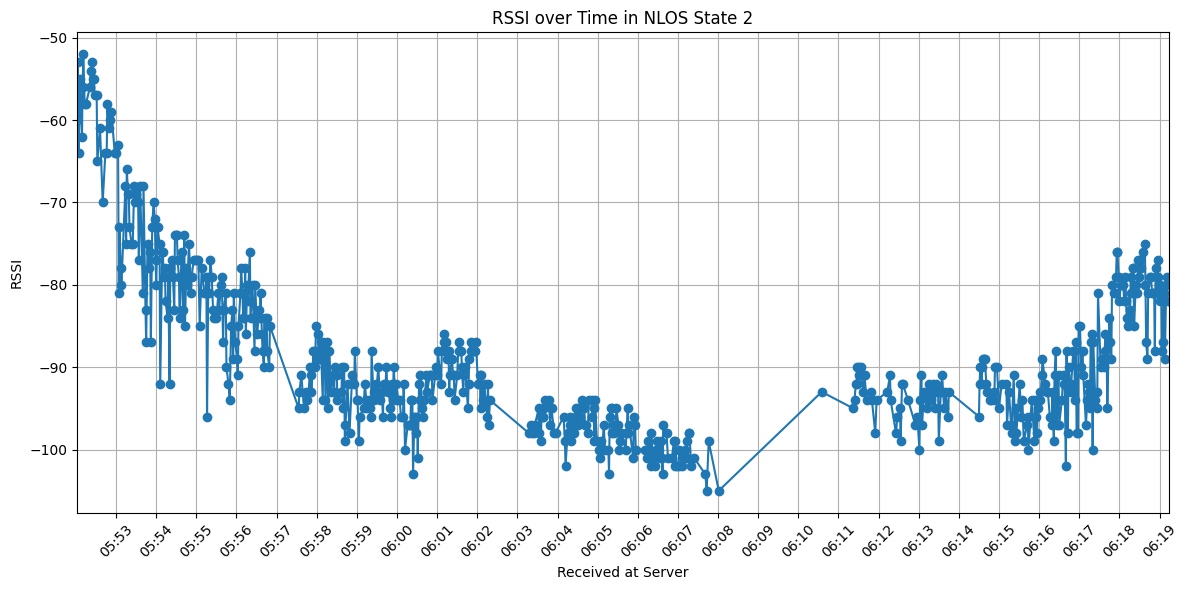

In [41]:
PlotByTime(df_2['received_at_server'], df_2['RSSI'],'RSSI over Time in NLOS State 2', "Received at Server",'RSSI')

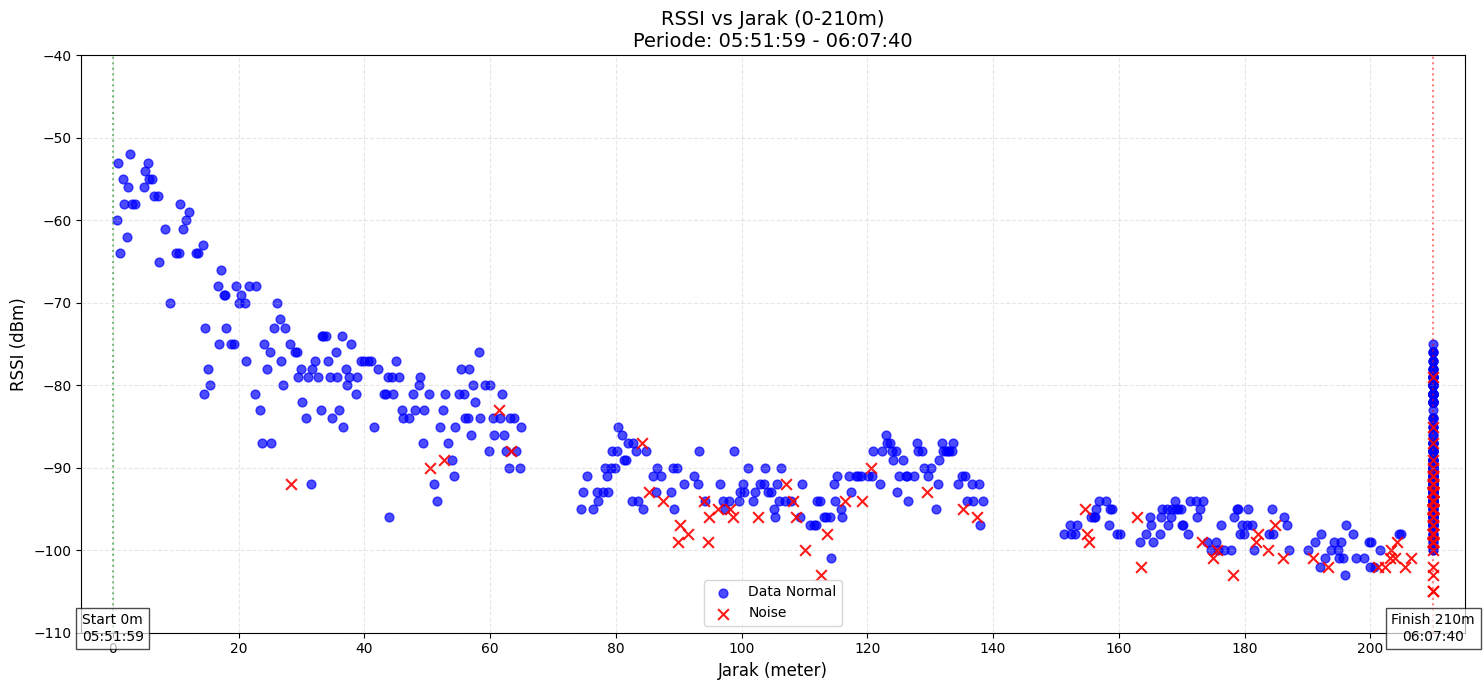


Verifikasi Jarak:
05:51:59: 0.0m
05:55:00: 40.4m
06:00:00: 107.3m
06:05:00: 174.3m
06:07:40: 210.0m


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Fungsi untuk mengkonversi waktu ke jarak
def waktu_ke_jarak(waktu):
    waktu = waktu.time()
    start = time(5, 51, 59)
    end = time(6, 7, 40)
    
    total_duration = (datetime.combine(datetime.today(), end) - 
                     datetime.combine(datetime.today(), start)).total_seconds()
    
    current_duration = (datetime.combine(datetime.today(), waktu) - 
                       datetime.combine(datetime.today(), start)).total_seconds()
    
    # Linear movement from 0m to 210m
    distance = min(210 * (current_duration / total_duration), 210)
    return distance

# Contoh data (ganti dengan data asli Anda)

# Hitung jarak
df_2['time'] = pd.to_datetime(df_2['received_at_server'])
df_2['jarak'] = df_2['time'].apply(waktu_ke_jarak)
df_2['jarak_rounded'] = df_2['jarak'].round().astype(int)

# Plotting
plt.figure(figsize=(15, 7))

# Pisahkan data normal dan noise
normal_data = df_2[df_2['isNoise'] == False]
noise_data = df_2[df_2['isNoise'] == True]

# Plot data
plt.scatter(normal_data['jarak'], normal_data['RSSI'], 
            alpha=0.7, color='blue', s=40, label='Data Normal')
plt.scatter(noise_data['jarak'], noise_data['RSSI'], 
            alpha=0.9, color='red', marker='x', s=60, label='Noise')

# Garis timeline
plt.axvline(x=0, color='green', linestyle=':', alpha=0.5)
plt.text(0, plt.ylim()[0], 'Start 0m\n05:51:59', 
         ha='center', va='top', bbox=dict(facecolor='white', alpha=0.7))

plt.axvline(x=210, color='red', linestyle=':', alpha=0.5)
plt.text(210, plt.ylim()[0], 'Finish 210m\n06:07:40', 
         ha='center', va='top', bbox=dict(facecolor='white', alpha=0.7))

# Model teoritis
distances = np.linspace(1, 210, 100)

# Konfigurasi plot
plt.title('RSSI vs Jarak (0-210m)\nPeriode: 05:51:59 - 06:07:40', fontsize=14)
plt.xlabel('Jarak (meter)', fontsize=12)
plt.ylabel('RSSI (dBm)', fontsize=12)
plt.xticks(np.arange(0, 211, 20))
plt.xlim(-5, 215)
plt.ylim(-110, -40)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Verifikasi beberapa titik
print("\nVerifikasi Jarak:")
check_times = ['05:51:59', '05:55:00', '06:00:00', '06:05:00', '06:07:40']
for t in check_times:
    dist = waktu_ke_jarak(datetime.strptime(t, '%H:%M:%S'))
    print(f"{t}: {dist:.1f}m")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def calculate_distance(row):
    """Menghitung jarak berdasarkan waktu dengan asumsi kecepatan konstan"""
    start_time = datetime.strptime('05:51:59', '%H:%M:%S').time()
    end_time = datetime.strptime('06:07:40', '%H:%M:%S').time()
    
    current_time = row['received_at_server'].time()
    
    # Hitung total durasi perjalanan dalam detik
    total_duration = (datetime.combine(datetime.today(), end_time) - 
                     datetime.combine(datetime.today(), start_time)).total_seconds()
    
    # Hitung waktu yang telah berlalu sejak start
    elapsed = (datetime.combine(datetime.today(), current_time) - 
              datetime.combine(datetime.today(), start_time)).total_seconds()
    
    # Hitung jarak (0-210m)
    distance = min(210 * (elapsed / total_duration), 210)
    
    return distance

# Proses data
df_2['received_at_server'] = pd.to_datetime(df_2['received_at_server'])
df_2['jarak'] = df_2.apply(calculate_distance, axis=1)
df_2['jarak_rounded'] = df_2['jarak'].round().astype(int)

# Visualisasi
plt.figure(figsize=(16, 8))

# Plot data
plt.scatter(df_2['jarak'], df_2['RSSI'], 
            alpha=0.6, 
            c=df_2['jarak'], 
            cmap='viridis',
            label='Data Pengukuran')

# Garis timeline
plt.axvline(x=0, color='green', linestyle='--', alpha=0.7, label='Start (05:51:59)')
plt.axvline(x=210, color='red', linestyle='--', alpha=0.7, label='Finish (06:07:40)')

# Model teoritis
distances = np.linspace(0.1, 210, 100)

# Konfigurasi plot
plt.title('RSSI vs Jarak (0-210m)\n05:51:59 - 06:07:40', fontsize=16, pad=20)
plt.xlabel('Jarak (meter)', fontsize=14)
plt.ylabel('RSSI (dBm)', fontsize=14)
plt.xticks(np.arange(0, 211, 20))
plt.xlim(-5, 215)
plt.ylim(-120, -30)
plt.grid(True, linestyle='--', alpha=0.4)
plt.colorbar(label='Jarak (m)')
plt.legend()

plt.tight_layout()
plt.show()

# Analisis
duration = (datetime.combine(datetime.today(), datetime.strptime('06:07:40', '%H:%M:%S').time()) - \
datetime.combine(datetime.today(), datetime.strptime('05:51:59', '%H:%M:%S').time()))

print(f"Analisis Perjalanan:")
print(f"Durasi: {duration.total_seconds()/60:.2f} menit")
print(f"Kecepatan rata-rata: {210/(duration.total_seconds()/60):.2f} meter/menit")
print(f"Jumlah data point: {len(df)}")
print(f"Data density: {len(df)/210:.1f} data/meter")

In [ ]:
# Deteksi baris dengan gap > 30 detik
df_2['received_at_server'] = pd.to_datetime(df_2['received_at_server'])
df_2['time_diff'] = df_2['received_at_server'].diff().dt.total_seconds()
df_2 = df_2[df_2['time_diff'] <= 20].reset_index(drop=True)  # Hapus baris setelah gap
df_2.drop(columns='time_diff', inplace=True)


In [56]:
import pandas as pd

# Contoh DataFrame awa

# Hitung banyaknya data per jarak_rounded
value_counts = df_2['jarak_rounded'].value_counts().sort_index()

# Buat list baru untuk jarak hasil penyesuaian
adjusted_jarak = []

# Mulai dari jarak terkecil
current_meter = value_counts.index.min()
data_idx = 0  # index penelusuran pada df_2

# Total jumlah data
total_data = len(df_2)

while data_idx < total_data:
    # Ambil jumlah data untuk diisi pada meter ini (default 1)
    count_here = value_counts.iloc[0] if not value_counts.empty else 0
    
    if count_here > 0:
        # Tambahkan sebanyak count_here ke meter saat ini
        adjusted_jarak.extend([current_meter] * count_here)
        data_idx += count_here
        # Kurangi jumlah yang sudah diambil
        value_counts.iloc[0] -= count_here
        if value_counts.iloc[0] == 0:
            value_counts = value_counts.iloc[1:]  # hapus elemen jika sudah 0
    else:
        # Jika meter ini kosong, langsung isi dengan data dari meter selanjutnya
        if not value_counts.empty:
            next_count = value_counts.iloc[0]
            adjusted_jarak.extend([current_meter] * next_count)
            data_idx += next_count
            value_counts = value_counts.iloc[1:]
    current_meter += 1

# Buat DataFrame hasil
df_2['jarak_rounded_adjusted'] = adjusted_jarak


In [128]:
def PlotByRange(df, skala, title):  
  plt.figure(figsize=(10, 6))

  # Pisahkan data normal dan noise
  normal_data = df[df['isNoise'] == False]
  noise_data = df[df['isNoise'] == True]

  # Plot data
  plt.scatter(normal_data['jarak_rounded'], normal_data['RSSI'], 
              alpha=0.7, color='blue', s=40, label='Valid Data')
  plt.scatter(noise_data['jarak_rounded'], noise_data['RSSI'], 
              alpha=0.9, color='red', marker='x', s=60, label='Invalid Data')

  # Garis timeline

  # Model teoritis
  distances = np.linspace(1, 210, 100)

  # Konfigurasi plot
  plt.title('Hubungan RSSI dengan Jarak Kondisi NLOS data ke ' + title, fontsize=14)
  plt.xlabel('Jarak (meter)', fontsize=12)
  plt.ylabel('RSSI (dBm)', fontsize=12)
  plt.xticks(np.arange(0, int(skala), 20))
  plt.xlim(-5, 215)
  plt.ylim(-120, -20)
  plt.grid(True, linestyle='--', alpha=0.3)
  plt.legend()

  plt.tight_layout()
  plt.show()

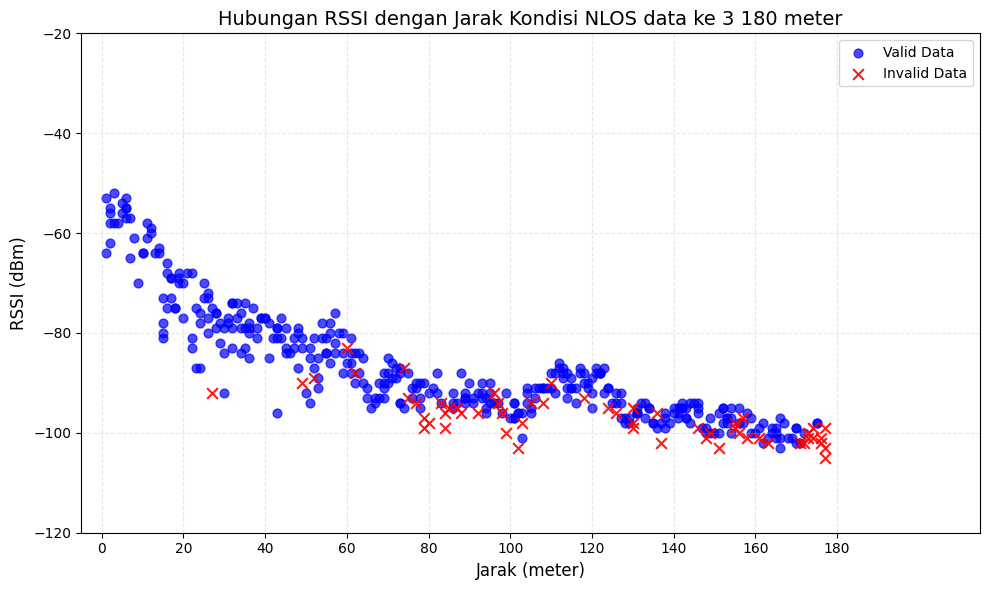

In [129]:
# Plotting
PlotByRange(df_2, 190, "3 180 meter")


### Ambil data NLOS ke 3

In [79]:
start_time = pd.to_datetime("06:58:40").time()
end_time = pd.to_datetime("07:30:00").time()

df_3 = df_1_juni[
    (df_1_juni['received_at_server'].dt.time >= start_time) &
    (df_1_juni['received_at_server'].dt.time <= end_time)
]

df_3.head()


,received_at_server,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,isNoise
1087,2025-06-01 06:58:58,2025-06-01 06:58:55,2025-06-01 06:58:57,2025-06-01 06:58:57.600,-30,False
1088,2025-06-01 06:59:00,2025-06-01 06:58:57,2025-06-01 06:58:58,2025-06-01 06:58:58.970,-30,False
1089,2025-06-01 06:59:02,2025-06-01 06:58:59,2025-06-01 06:59:01,2025-06-01 06:59:01.738,-46,False
1090,2025-06-01 06:59:04,2025-06-01 06:59:01,2025-06-01 06:59:03,2025-06-01 06:59:03.106,-46,False
1091,2025-06-01 06:59:08,2025-06-01 06:59:05,2025-06-01 06:59:07,2025-06-01 06:59:07.259,-59,False


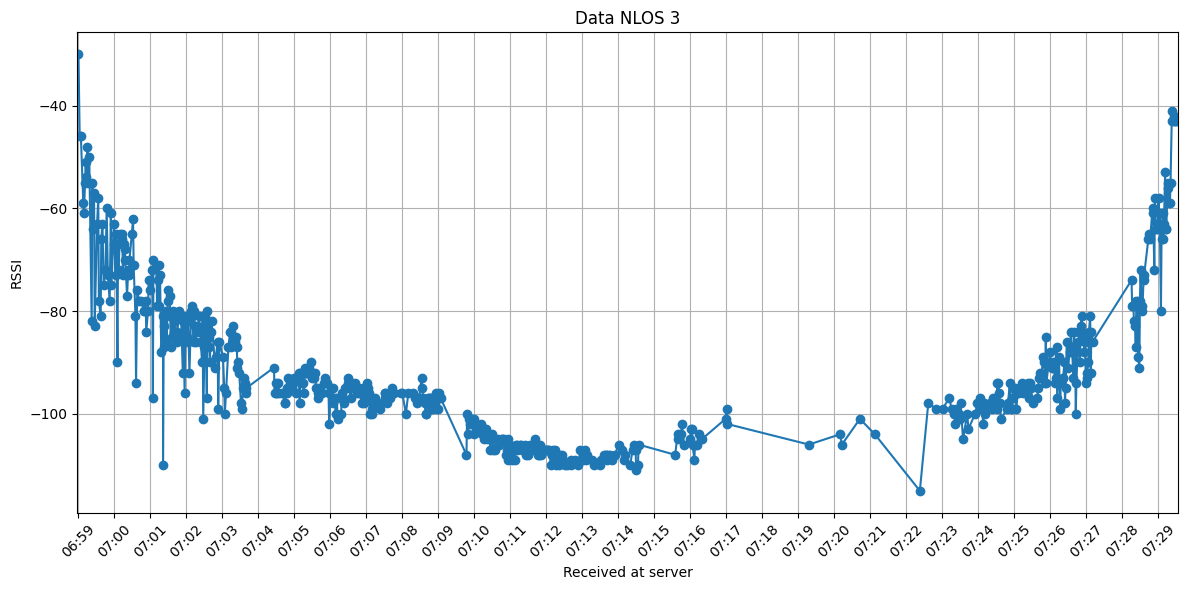

In [68]:
PlotByTime(df_3['received_at_server'], df_3['RSSI'], "Data NLOS 3", "Received at server", 'RSSI')

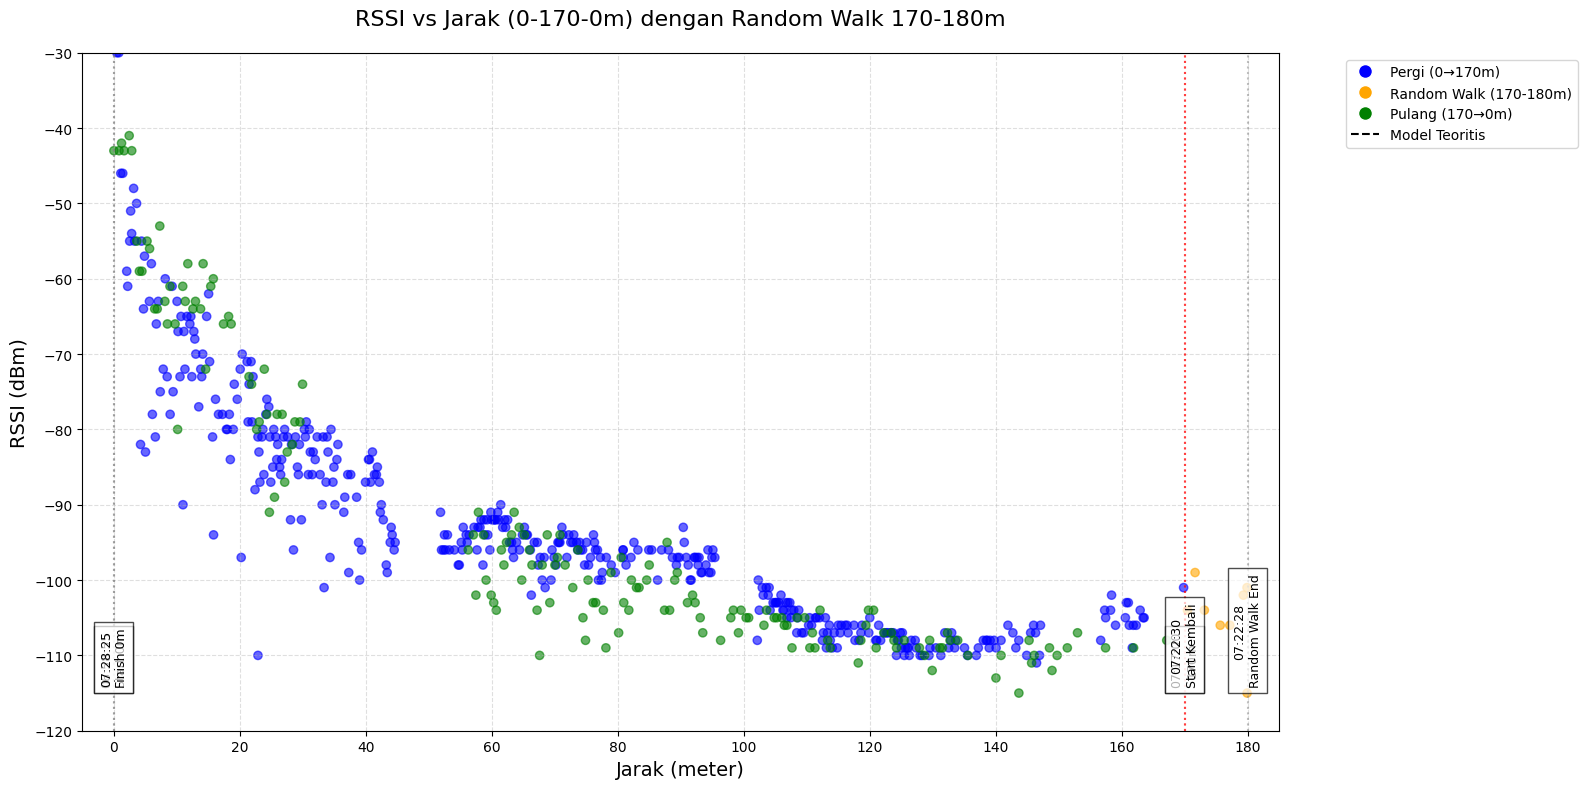

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def assign_distance_with_random_walk(df):
    # Pastikan kolom waktu sudah datetime
    df = df.sort_values('received_at_server')
    
    # Timeline kunci
    start_time = datetime.strptime('06:58:55', '%H:%M:%S').time()
    arrive_170m = datetime.strptime('07:17:00', '%H:%M:%S').time()
    start_return = datetime.strptime('07:22:30', '%H:%M:%S').time()
    end_time = datetime.strptime('07:29:30', '%H:%M:%S').time()
    
    # Inisialisasi kolom
    df['jarak'] = np.nan
    df['status'] = ''
    
    for idx, row in df.iterrows():
        current_time = row['received_at_server'].time()
        
        # 1. Fase awal: 0m -> 170m (06:58:55 - 07:17:00)
        if start_time <= current_time <= arrive_170m:
            progress = (datetime.combine(datetime.today(), current_time) - 
                      datetime.combine(datetime.today(), start_time)).total_seconds()
            total_duration = (datetime.combine(datetime.today(), arrive_170m) - 
                           datetime.combine(datetime.today(), start_time)).total_seconds()
            df.at[idx, 'jarak'] = min(170 * (progress / total_duration), 170)
            df.at[idx, 'status'] = 'pergi'
        
        # 2. Random walk: 170-180m (07:17:00 - 07:22:28)
        elif arrive_170m < current_time < start_return:
            # Berikan variasi random antara 170-180m
            df.at[idx, 'jarak'] = 170 + 10 * np.random.random()
            df.at[idx, 'status'] = 'random_walk'
        
        # 3. Kembali ke 0m (07:22:30 - 07:28:25)
        elif start_return <= current_time <= end_time:
            progress = (datetime.combine(datetime.today(), current_time) - 
                      datetime.combine(datetime.today(), start_return)).total_seconds()
            total_duration = (datetime.combine(datetime.today(), end_time) - 
                           datetime.combine(datetime.today(), start_return)).total_seconds()
            df.at[idx, 'jarak'] = 170 * (1 - progress / total_duration)
            df.at[idx, 'status'] = 'pulang'
    
    # Bulatkan jarak dan handle nilai di luar timeline
    df['jarak_rounded'] = df['jarak'].round().astype('Int64')
    df.loc[df['received_at_server'].dt.time < start_time, 'jarak_rounded'] = 0
    df.loc[df['received_at_server'].dt.time > end_time, 'jarak_rounded'] = 0
    
    return df

# Proses data
df_3 = assign_distance_with_random_walk(df_3)
mask = (df_3['status'] == 'pulang') & (df_3['jarak'].between(50, 170))
df_3.loc[mask, 'RSSI'] -= 10

# Visualisasi
plt.figure(figsize=(16, 8))

# Plot dengan warna berdasarkan status
colors = {'pergi':'blue', 'random_walk':'orange', 'pulang':'green'}
plt.scatter(df_3['jarak'], df_3['RSSI'], 
            c=df_3['status'].map(colors).fillna('gray'),  # fallback ke warna 'gray'
            alpha=0.6, label='Data')

# Anotasi timeline
events = [
    ('06:58:55', 'Start 0m', 0),
    ('07:17:00', '170m', 170),
    ('07:22:28', 'Random Walk End', 180),
    ('07:22:30', 'Start Kembali', 170),
    ('07:28:25', 'Finish 0m', 0)
]

for time_str, label, pos in events:
    plt.axvline(x=pos, color='red' if pos==170 else 'gray', linestyle=':', alpha=0.5)
    plt.text(pos, plt.ylim()[0]+5, f"{time_str}\n{label}", 
             rotation=90, va='bottom', ha='center', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7))

# Model teoritis
distances = np.linspace(0.1, 180, 100)

plt.title('RSSI vs Jarak (0-170-0m) dengan Random Walk 170-180m', fontsize=16, pad=20)
plt.xlabel('Jarak (meter)', fontsize=14)
plt.ylabel('RSSI (dBm)', fontsize=14)
plt.xticks(np.arange(0, 181, 20))
plt.xlim(-5, 185)
plt.ylim(-120, -30)
plt.grid(True, linestyle='--', alpha=0.4)

# Legenda custom
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Pergi (0→170m)',
          markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Random Walk (170-180m)',
          markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Pulang (170→0m)',
          markerfacecolor='green', markersize=10),
    Line2D([0], [0], color='k', linestyle='--', label='Model Teoritis')
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

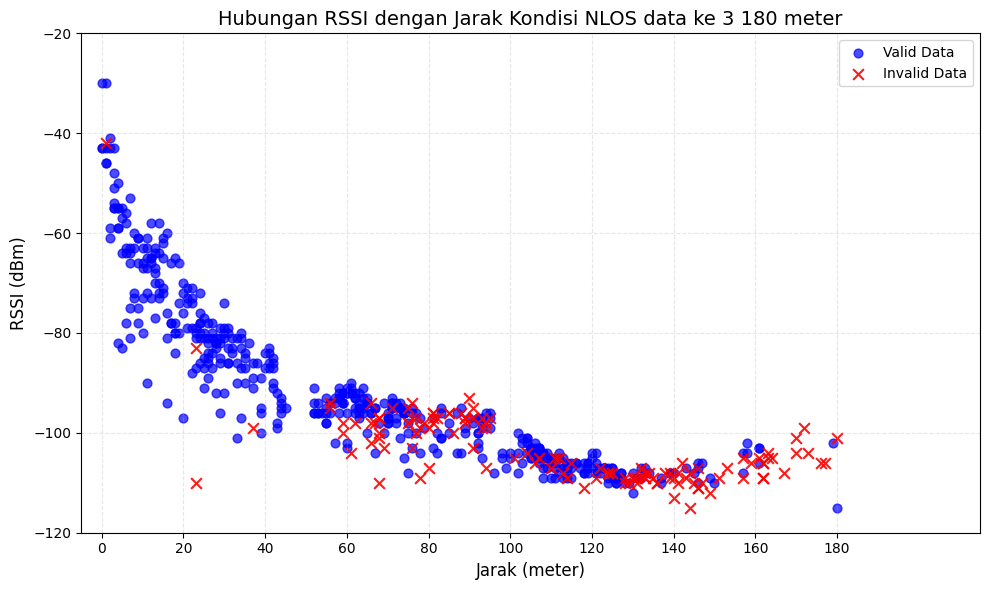

In [130]:
PlotByRange(df_3, 185, "3 180 meter")

### Ambil data ke 4

In [110]:
start_time = pd.to_datetime("07:30:30").time()
end_time = pd.to_datetime("07:57:00").time()

df_4 = df_1_juni[
    (df_1_juni['received_at_server'].dt.time >= start_time) &
    (df_1_juni['received_at_server'].dt.time <= end_time)
]

df_4.head()

,received_at_server,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,isNoise
1679,2025-06-01 07:31:42,,2025-06-01 07:31:41,2025-06-01 07:31:41.724,-33,True
1680,2025-06-01 07:31:43,2025-06-01 07:31:40,2025-06-01 07:31:42,2025-06-01 07:31:42.117,-32,False
1681,2025-06-01 07:31:45,2025-06-01 07:31:41,2025-06-01 07:31:43,2025-06-01 07:31:44.483,-38,False
1682,2025-06-01 07:31:46,2025-06-01 07:31:43,2025-06-01 07:31:45,2025-06-01 07:31:45.879,-36,False
1683,2025-06-01 07:31:49,2025-06-01 07:31:46,2025-06-01 07:31:48,2025-06-01 07:31:48.606,-36,False


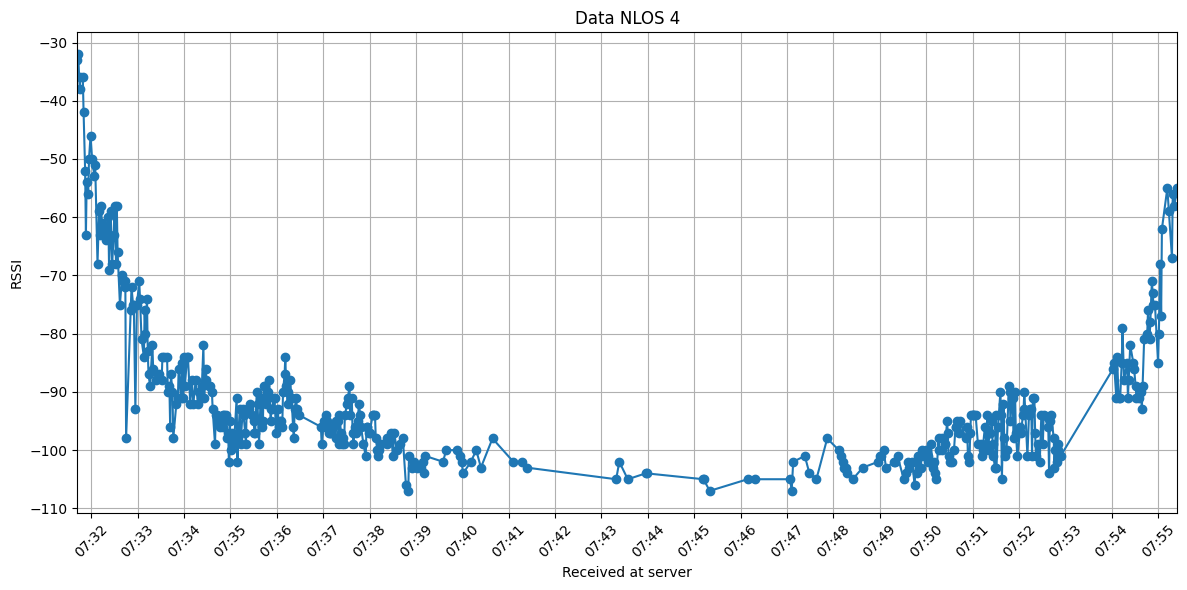

In [111]:
PlotByTime(df_4['received_at_server'], df_4['RSSI'], "Data NLOS 4", "Received at server", 'RSSI')

In [120]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def assign_distance_150m(df):
    df = df.sort_values('received_at_server')

    start_time = datetime.strptime('07:31:42', '%H:%M:%S').time()
    arrive_150m = datetime.strptime('07:41:30', '%H:%M:%S').time()
    random_start = datetime.strptime('07:42:00', '%H:%M:%S').time()
    random_end = datetime.strptime('07:46:59', '%H:%M:%S').time()
    return_start = datetime.strptime('07:47:00', '%H:%M:%S').time()
    return_end = datetime.strptime('07:57:00', '%H:%M:%S').time()

    df['jarak'] = np.nan
    df['status'] = ''

    for idx, row in df.iterrows():
        current_time = row['received_at_server'].time()

        if start_time <= current_time <= arrive_150m:
            progress = (datetime.combine(datetime.today(), current_time) -
                        datetime.combine(datetime.today(), start_time)).total_seconds()
            total_duration = (datetime.combine(datetime.today(), arrive_150m) -
                              datetime.combine(datetime.today(), start_time)).total_seconds()
            df.at[idx, 'jarak'] = min(150 * (progress / total_duration), 150)
            df.at[idx, 'status'] = 'pergi'

        elif random_start <= current_time <= random_end:
            df.at[idx, 'jarak'] = 150 + 5 * np.random.random()
            df.at[idx, 'status'] = 'random_walk'

        elif return_start <= current_time <= return_end:
            progress = (datetime.combine(datetime.today(), current_time) -
                        datetime.combine(datetime.today(), return_start)).total_seconds()
            total_duration = (datetime.combine(datetime.today(), return_end) -
                              datetime.combine(datetime.today(), return_start)).total_seconds()
            df.at[idx, 'jarak'] = 150 * (1 - progress / total_duration)
            df.at[idx, 'status'] = 'pulang'

    # Koreksi: geser jarak 20m untuk status pulang pada jarak 20-50m
    mask = (df['status'] == 'pulang') & (df['jarak'] >= 20) & (df['jarak'] <= 50)
    df.loc[mask, 'jarak'] = df.loc[mask, 'jarak'] - 15

    # Bulatkan & set nilai di luar rentang menjadi 0
    df['jarak_rounded'] = df['jarak'].round().astype('Int64')
    df.loc[df['received_at_server'].dt.time < start_time, 'jarak_rounded'] = 0
    df.loc[df['received_at_server'].dt.time > return_end, 'jarak_rounded'] = 0

    return df


# Terapkan ke df_4
df_4 = assign_distance_150m(df_4)


In [ ]:
plt.figure(figsize=(16, 8))

colors = {'pergi': 'blue', 'random_walk': 'orange', 'pulang': 'green'}
plt.scatter(df_4['jarak'], df_4['RSSI'], 
            c=df_4['status'].map(colors).fillna('gray'), alpha=0.6)

events = [
    
    ('07:41:30', '150m', 150),
    ('07:42:00', 'Random Start', 150),
    ('07:46:59', 'Random End', 155),
    
]

for time_str, label, pos in events:
    plt.axvline(x=pos, color='red' if pos==150 else 'gray', linestyle=':', alpha=0.5)
    plt.text(pos, plt.ylim()[0]+5, f"{time_str}\n{label}", 
             rotation=90, va='bottom', ha='center', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7))

plt.title('RSSI vs Jarak (0-150-0m) dengan Random Walk 150-155m', fontsize=16)
plt.xlabel('Jarak (meter)', fontsize=14)
plt.ylabel('RSSI (dBm)', fontsize=14)
plt.xticks(np.arange(0, 161, 20))
plt.xlim(-5, 160)
plt.ylim(-120, -30)
plt.grid(True, linestyle='--', alpha=0.4)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Pergi (0→150m)',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Random Walk (150-155m)',
           markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Pulang (150→0m)',
           markerfacecolor='green', markersize=10),
]
plt.legend()

plt.tight_layout()
plt.show()


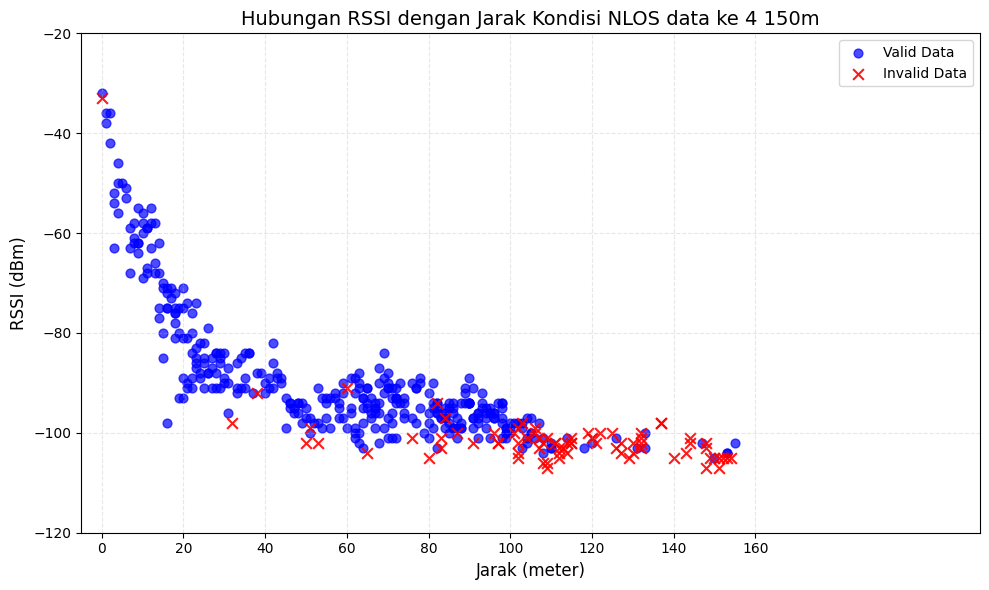

In [131]:
PlotByRange(df_4, 170, "4 150m")

### Ambil Data ke 5

In [133]:
start_time = pd.to_datetime("07:57:23").time()
end_time = pd.to_datetime("08:16:00").time()

df_5 = df_1_juni[
    (df_1_juni['received_at_server'].dt.time >= start_time) &
    (df_1_juni['received_at_server'].dt.time <= end_time)
]

df_5.head()

,received_at_server,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,isNoise
2113,2025-06-01 07:57:23,2025-06-01 07:57:20,2025-06-01 07:57:22,2025-06-01 07:57:22.893,-42,False
2114,2025-06-01 07:57:24,2025-06-01 07:57:21,2025-06-01 07:57:23,2025-06-01 07:57:23.270,-39,False
2115,2025-06-01 07:57:26,2025-06-01 07:57:23,2025-06-01 07:57:25,2025-06-01 07:57:25.648,-42,False
2116,2025-06-01 07:57:27,2025-06-01 07:57:24,2025-06-01 07:57:26,2025-06-01 07:57:26.029,-44,False
2117,2025-06-01 07:57:29,2025-06-01 07:57:25,2025-06-01 07:57:27,2025-06-01 07:57:27.410,-53,False


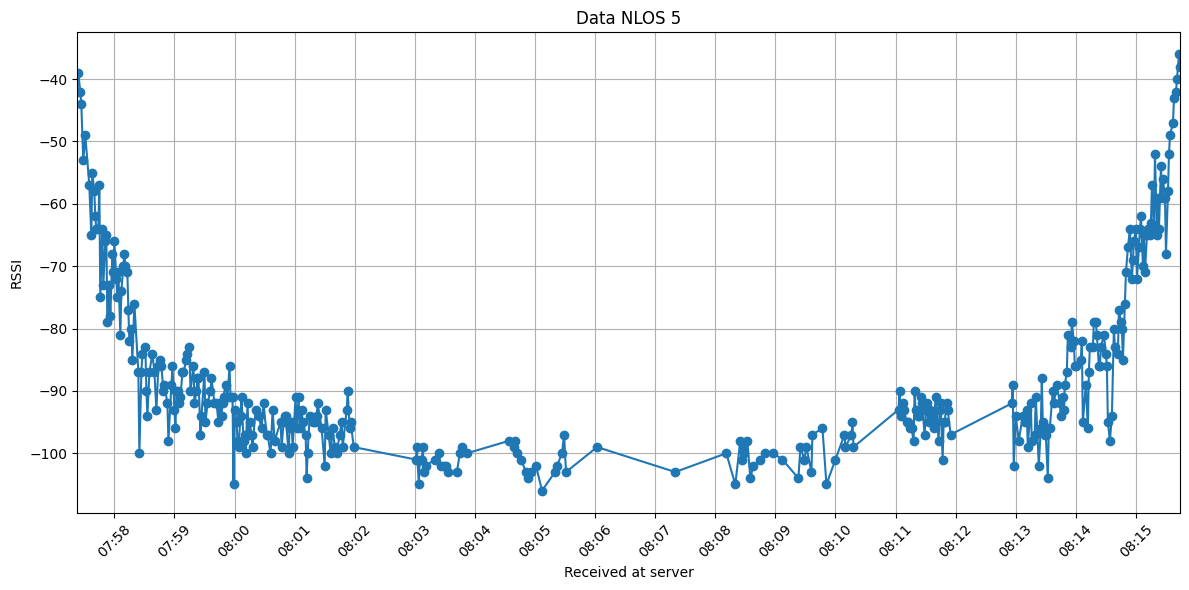

In [134]:
PlotByTime(df_5['received_at_server'], df_5['RSSI'], "Data NLOS 5", "Received at server", 'RSSI')